In [2]:
!pip install -q diffusers transformers accelerate omegaconf invisible-watermark>=0.2.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.4.0 requires fsspec==2023.4.0, but you have fsspec 2023.12.2 which is incompatible.


In [6]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline_text2image = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

# prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
# image = pipeline_text2image(prompt=prompt).images[0]
# image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

# use from_pipe to avoid consuming additional memory when loading a checkpoint
pipeline = AutoPipelineForInpainting.from_pipe(pipeline_text2image).to("cuda")

init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

prompt = "a rock mountain"
negative_prompt = "bad anatomy, deformed, ugly, disfigured"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)

  0%|          | 0/49 [00:00<?, ?it/s]

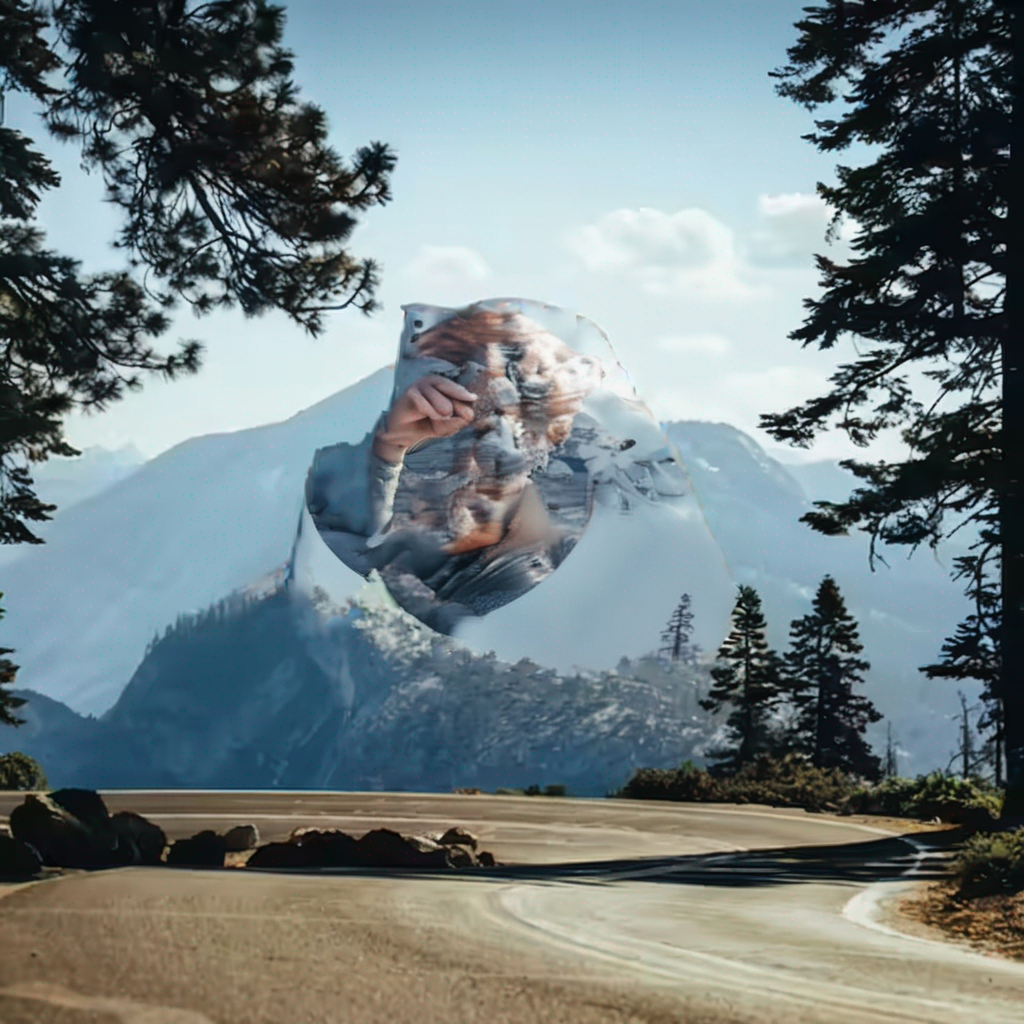

In [25]:
image

In [19]:
torch.cuda.memory_allocated()

7083913728

In [17]:
import gc

gc.collect()

torch.cuda.empty_cache()